# <font style="color:blue">Assignment: Implement the Adam Optimizer</font>

In machine learning, our objective function is the loss that we minimize using different optimizers. Optimizers can optimize any function, whether it is a loss function or any other function. 

In this assignment, we will minimize a very simple function (a parabola) using an adam optimizer. You have to implement the gradient of the function and the adam optimizer. 


## <font color='blue'>Marking Scheme</font>

#### Maximum Points: 30

<div>
    <table>
        <tr><td><h3>Sr. no.</h3></td> <td><h3>Problem</h3></td> <td><h3>Points</h3></td> </tr>
        <tr><td><h3>1</h3></td> <td><h3>3. Implement the Gradient</h3></td> <td><h3>5</h3></td> </tr>
        <tr><td><h3>2</h3></td> <td><h3>4. Implement the Adam Optimizer</h3></td> <td><h3>25</h3></td> </tr>
    </table>
</div>

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

import torch
import torch.nn as nn
import math
import copy

import time
from collections import defaultdict

import matplotlib.pyplot as plt
plt.style.use('ggplot')

# <font style="color:green">1. The Objective Function</font>

**The objective function is the f0llowing:**
$$
f(x) = x^2 -5x + 6
$$

Have to find the value of $x$ for which the value of the function will be minimum.


**In the following cell, the function has been implemented.**

In [2]:
def function(x):
    fun = x**2 - 5*x + 6
    return fun

# <font style="color:green">2. The Visualizer</font>

**In this section, we have code to visualize the function and the learning process to find a minimum.**

In [3]:
plt.rcParams["figure.figsize"] = (8, 8)

In [4]:
class MatplotlibVisualizer:
    def __init__(self):
        
        self.plotdic = {
            'x': [],
            'y': [],
            'color': 'b',
            'linestyle': '-',
            'label': None,
            'linewidth': 1
        }
        self.plots = defaultdict(list)
        self._figures = {}
        self._axes = {}
        

    def init_new_figure(self, name, xlabel, ylabel, dic_list=[]):
        if len(dic_list) == 0:
            dic_list.append(self.plotdic)
        fig, ax = plt.subplots(1, 1)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        fig.suptitle(name, fontsize=10)
        self._figures[name] = fig
        self._axes[name] = ax
        for dic in dic_list:
            d = dict()
            for key, value in copy.deepcopy(self.plotdic).items():
                d[key] = dic.get(key, value)
            self.plots[name].append(d)
            
        return

    def plot(self):
        for key, value in self.plots.items():
            
            ax = self._axes[key]
            fig = self._figures[key]
            labels = []
            for plot in self.plots[key]:
                ax.plot(plot['x'], plot['y'], linestyle=plot['linestyle'], 
                        linewidth=plot['linewidth'], color=plot['color'])
                
                if len(plot['x']) > 0:
                    labels.append(plot['label'])
                
            ax.legend(labels) 
            ax.relim()
            ax.autoscale_view()
            fig.canvas.draw()
        plt.show()

    def _update_plots(self, name, new_x, new_y, plot_num):
        self.plots[name][plot_num]['x'].append(new_x)
        self.plots[name][plot_num]['y'].append(new_y)

    def update_charts(self, name, new_x, new_y, plot_num=0):
        self._update_plots(name, new_x, new_y, plot_num)
        self.plot()

<IPython.core.display.Javascript object>


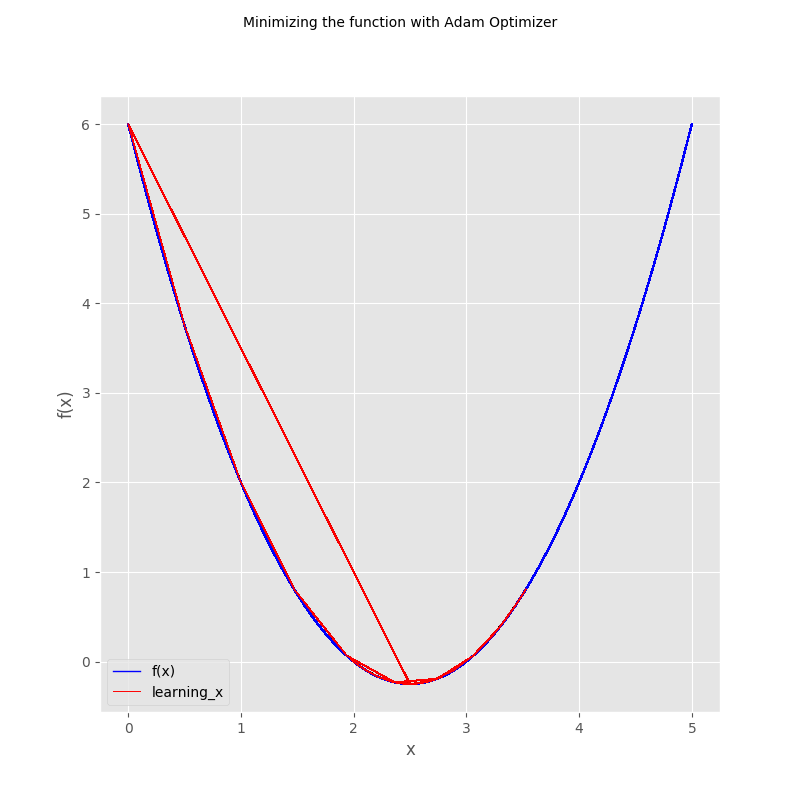

In [5]:

# values of x
x = torch.linspace(0, 5, 100)

# f(x) for all x
y = function(x)

# plot name
plt_name = 'Minimizing the function with Adam Optimizer'


xlabel = 'x'
ylabel = 'f(x)'

# init the visualizer class
viz = MatplotlibVisualizer()

# dictionary for function plot
dic = {
    'color': 'b',
    'label': 'f(x)'
}

# dictionary for learning plot
dic1 = {
    'color': 'r',
    'label': 'learning_x',
    'linewidth': 0.7
}
viz.init_new_figure(plt_name, xlabel, ylabel, dic_list=[dic, dic1])

# let's plot the function
for i in range(len(x)):
    viz.update_charts(plt_name, x[i], y[i], plot_num=0)
    
    

# <font style="color:green">3. Implement the Gradient [5 Points]</font>

**You have to implement the gradient of the function ($f(x) = x^2 -5x + 6$).**

In [6]:
def grad_function(x):
    grad_fun = None
    
    ###
    grad_fun = 2 * x - 5
    ###
    return grad_fun

In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:green">4. Implement the Adam Optimizer [25 Points]</font>

**Adam update rule:**
$$
\begin{align}
v_t &= \beta_1 v_{t-1} + (1 - \beta_1) g_{t-1} \\
\\
s_t &= \beta_2 s_{t-1} + (1 - \beta_2) g_{t-1}^2 \\
\\
\hat{v_t} &= \frac{v_t}{1 - {\beta_1}^t} \\
\\
\hat{s_t} &= \frac{s_t}{1 - {\beta_2}^t} \\
\\
x_t &= x_{t-1} - \alpha \frac {\hat{v_{t}}}{\sqrt {\hat{s_t}} + \epsilon} \\
\end{align}
$$

**In this section, you have to implement the adam optimizer. Write your code where is specified, do not change anything else.**

Find the paper of Adam Optimizer [here](https://arxiv.org/pdf/1412.6980.pdf).

In [12]:
class AdamOptimizer(nn.Module):
    
    def __init__(self, alpha=0.5, beta_1=0.9, beta_2=0.99, epsilon=1e-5):
        super().__init__()
        
        self.alpha = alpha
        self.beta_1 = beta_1
        self.beta_2 = beta_2
        self.epsilon = epsilon
        
        self.v_current = 0
        self.s_current = 0
        self.iter = 0
        
    def forward(self, x_current, grad):
        x_next = None
        
        ###
        self.iter += 1
        self.v_current = (self.beta_1 * self.v_current) + ((1 - self.beta_1) * grad)
        self.s_current = (self.beta_2 * self.s_current) + ((1 - self.beta_2) * math.pow(grad, 2))       
        cap_v = self.v_current / (1 -  math.pow(self.beta_1, self.iter))
        cap_s = self.s_current / (1 -  math.pow(self.beta_2, self.iter))        
        x_next = x_current - (self.alpha * (cap_v / (math.sqrt(cap_s) + self.epsilon)))        
       
        ###
        
        return x_next
        

In [9]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# <font style="color:green">5. Check your Implementations</font>

**Let's start with $x=0$ and find the value of $x$ for which the function will have the minimum value. The following function will also return the `number of iteration` to reach this value.**


In [13]:
def find_minimum(initial_x, fun, grad_fun, x_change_stop_value=1e-5):
    current_x = initial_x
    optimizer = AdamOptimizer()
    viz.update_charts(plt_name, initial_x, fun(initial_x), plot_num=1)
    num_iter = 0
    wait = 0
    while True:
        f = fun(current_x)
        g_f = grad_fun(current_x)
        x_next = optimizer(current_x, g_f)
        viz.update_charts(plt_name, x_next, fun(x_next), plot_num=1)
        num_iter += 1
        if abs(current_x - x_next) < x_change_stop_value:
            wait += 1
        else:
            wait = 0
            
        if wait > 10:
            break
        current_x = x_next
            
    return x_next, num_iter
    

**Running the below cell, you should get the following outputs:**

```
Value of x: 2.5, number of iteration: 234
```

**The function will have a minimum value at $x = 2.5$. We can reached close enough!!**

In [14]:
x, num_iteration = find_minimum(0, function, grad_function)
print('Value of x: {0:.5}, number of iteration: {1}'.format(x, num_iteration))

Value of x: 2.5, number of iteration: 234
